In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pylab as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')  # esto es para quitar prints
#para que salga el grafico
#pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
sharks = pd.read_csv('./attacks.csv',encoding='latin1')

In [3]:
sharks.columns=[c.lower().replace(' ', '') for c in sharks.columns]

In [4]:
# Dimension del DataFrame original 
dim_original=sharks.shape

sharks.shape

(25723, 24)

In [5]:
#Nombre de las columnas del Dataframe 
sharks.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber.1', 'casenumber.2', 'originalorder', 'unnamed:22',
       'unnamed:23'],
      dtype='object')

In [6]:
sharks.value_counts()

Series([], dtype: int64)

In [7]:
#Informacion del DataFrame
sharks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            8702 non-null   object 
 1   date                  6302 non-null   object 
 2   year                  6300 non-null   float64
 3   type                  6298 non-null   object 
 4   country               6252 non-null   object 
 5   area                  5847 non-null   object 
 6   location              5762 non-null   object 
 7   activity              5758 non-null   object 
 8   name                  6092 non-null   object 
 9   sex                   5737 non-null   object 
 10  age                   3471 non-null   object 
 11  injury                6274 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  2948 non-null   object 
 14  species               3464 non-null   object 
 15  investigatororsourc

In [8]:
#Columnas con valores nulos 
nan_cols=sharks.isna().sum()

nan_cols[nan_cols>0]

casenumber              17021
date                    19421
year                    19423
type                    19425
country                 19471
area                    19876
location                19961
activity                19965
name                    19631
sex                     19986
age                     22252
injury                  19449
fatal(y/n)              19960
time                    22775
species                 22259
investigatororsource    19438
pdf                     19421
hrefformula             19422
href                    19421
casenumber.1            19421
casenumber.2            19421
originalorder           19414
unnamed:22              25722
unnamed:23              25721
dtype: int64

In [9]:
nan_cols=sharks.isna().mean() * 100  # porcentaje de nulos por columna

nan_cols[nan_cols>0]

casenumber              66.170353
date                    75.500525
year                    75.508300
type                    75.516075
country                 75.694903
area                    77.269370
location                77.599813
activity                77.615364
name                    76.316915
sex                     77.697003
age                     86.506240
injury                  75.609377
fatal(y/n)              77.595926
time                    88.539439
species                 86.533453
investigatororsource    75.566614
pdf                     75.500525
hrefformula             75.504412
href                    75.500525
casenumber.1            75.500525
casenumber.2            75.500525
originalorder           75.473312
unnamed:22              99.996112
unnamed:23              99.992225
dtype: float64

In [10]:
def check_nan(df: pd.DataFrame) -> None:
    
    nan_cols=df.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show();


'N nan cols: 24'

casenumber              66.170353
date                    75.500525
year                    75.508300
type                    75.516075
country                 75.694903
area                    77.269370
location                77.599813
activity                77.615364
name                    76.316915
sex                     77.697003
age                     86.506240
injury                  75.609377
fatal(y/n)              77.595926
time                    88.539439
species                 86.533453
investigatororsource    75.566614
pdf                     75.500525
hrefformula             75.504412
href                    75.500525
casenumber.1            75.500525
casenumber.2            75.500525
originalorder           75.473312
unnamed:22              99.996112
unnamed:23              99.992225
dtype: float64

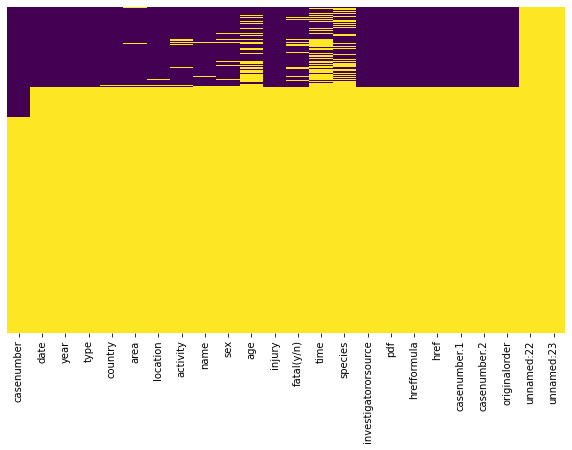

In [11]:
check_nan(sharks)

In [12]:
#Creo una copia just in case
s1 = sharks.copy()

In [13]:
# Borro columnas con mas del 80& de nulos, solo aquellas que en principio no aportan información como Unnamed:22 y Unnamed:23

cols=['unnamed:22', 'unnamed:23']

s1.drop(columns=cols, inplace=True)

'N nan cols: 22'

casenumber              66.170353
date                    75.500525
year                    75.508300
type                    75.516075
country                 75.694903
area                    77.269370
location                77.599813
activity                77.615364
name                    76.316915
sex                     77.697003
age                     86.506240
injury                  75.609377
fatal(y/n)              77.595926
time                    88.539439
species                 86.533453
investigatororsource    75.566614
pdf                     75.500525
hrefformula             75.504412
href                    75.500525
casenumber.1            75.500525
casenumber.2            75.500525
originalorder           75.473312
dtype: float64

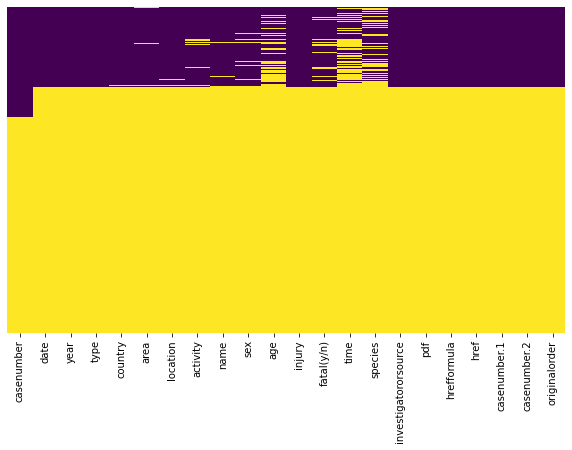

In [14]:
check_nan(s1)

In [15]:
s2 = s1.copy()

In [16]:
#s2[s2['Case Number'].notna()]

In [17]:
Inc_date=s2[s2['date'].isna()].index
s2.drop(Inc_date, inplace=True)

In [18]:
s2.shape

(6302, 22)

In [19]:
s2

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [20]:
#cols=['type', 'country','area','location','activity','name','sex','age','injury', 'fatal(Y/N)','species','investigatororsource','hrefformula'] 

In [21]:
s2.fillna('unknown', inplace=True) 

In [22]:
nan_cols2=s2.isna().sum()

nan_cols2[nan_cols>0]

casenumber              0
date                    0
year                    0
type                    0
country                 0
area                    0
location                0
activity                0
name                    0
sex                     0
age                     0
injury                  0
fatal(y/n)              0
time                    0
species                 0
investigatororsource    0
pdf                     0
hrefformula             0
href                    0
casenumber.1            0
casenumber.2            0
originalorder           0
dtype: int64

In [23]:
s2

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,unknown,FATAL,Y,unknown,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,unknown,FATAL,Y,unknown,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,unknown,FATAL,Y,unknown,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,unknown,FATAL,Y,unknown,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


'N nan cols: 0'

Series([], dtype: float64)

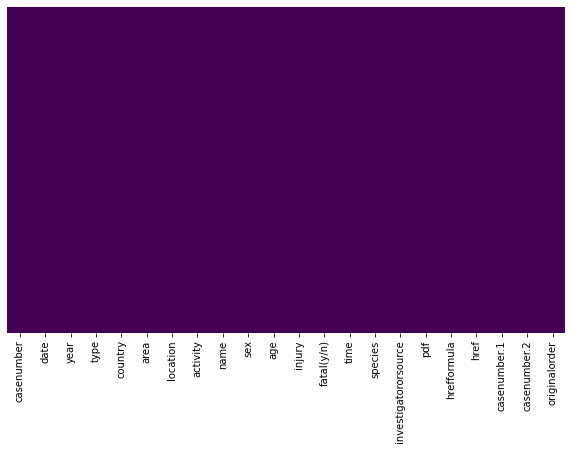

In [24]:
check_nan(s2)

In [25]:
s2[s2.name.str.contains('male')].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,unknown,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0
15,2018.05.12,12-May-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Nahoon Beach, East London",Surfing,male,M,unknown,"Minor injury, marks on board",N,11h00,unknown,"B.Jacob, Dispatch Live, 5/12/2018",2018.05.12-EastLondon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.12,2018.05.12,6288.0


In [26]:
s2['name']= s2['name'].replace('male', 'John Doe')

In [27]:
s2['name']= s2['name'].replace('female', 'Jane Doe')

In [28]:
s2[s2.name.str.contains('male')].head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
108,2017.07.29.a,29-Jul-2017,2017.0,Unprovoked,USA,South Carolina,"DeBordieu Colony, Georgetown County",unknown,female x 2,F,12,Bite to left thigh / minor injury,N,Afternoon,unknown,"C. Creswell, GSAF",2017.07.29.a-Georgetown.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.29.a,2017.07.29.a,6195.0
752,2012.08.15,15-Aug-2012,2012.0,Unprovoked,USA,Alabama,"Gulf Shores, Baldwin County",Wading or swimming,"male, a tourist from Germany",M,31,Lacerations to leg,N,unknown,unknown,"Fox 10, 8/17/2012",2012.08.15-GulfShoresSwimmer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.08.15,2012.08.15,5551.0
1061,2009.12.20.b,20-Dec-2009,2009.0,Boating,AUSTRALIA,Queensland,Mudjimba Island,Kayaking,2 males,M,unknown,"No injury to occupants, kayak bumped by shark",N,11h00,unknown,"C. Eksander, GSAF",2009.12.20.b-Queensland-Kayak.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.12.20.b,2009.12.20.b,5242.0
1188,2008.11.28,28-Nov-2008,2008.0,Unprovoked,EGYPT,Red Sea,Elphinstone Reef,Scuba diving,female diver,F,unknown,Lacerations to fingers,N,Morning,Oceanic whitetip shark,"E. Ritter, GSAF",2008.11.28-ElphinstoneReef.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.11.28,2008.11.28,5115.0
1234,2008.07.18,18-Jul-2008,2008.0,Unprovoked,EGYPT,unknown,Daedalus Reef,Diving,Russian male,M,unknown,Leg severed,N,unknown,Oceanic whitetip shark,Ocean7,2008.07.18-RedSea.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.07.18,2008.07.18,5069.0


In [29]:
new_name = []
for e in s2.name:
    if 'male' in e:
        e =e.replace('male', 'John Doe')
        new_name.append(e) 
    elif 'female' in e:
        e =e.replace('female' ,'Jane Doe')
        new_name.append(e)
    else:
        new_name.append(e)
        



In [30]:
s2.name=new_name

In [31]:
s2 = s2.rename(columns = {'date' : 'caseid'})

In [32]:
#Convertimos la columna casenumber en el id de los casos 
s2 = s2.rename(columns = {'casenumber' : 'date'})

In [33]:
new_index = []
for i in range(len(s2['caseid'])):
    new_index.append(i)

In [34]:
s2['caseid'] = new_index

In [35]:
#limpiamos la columna date para que las fechas queden en año mes dia 


In [36]:
def limpiar_date(x):
    
    num=re.findall('\d+.\d+.\d+', x)
    num=''.join(num)
    return num

In [37]:
s2['date'] = s2['date'].apply(limpiar_date)

In [38]:
s2.head(500)

,date,caseid,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,John Doe,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2014.10.02,495,2014.0,Unprovoked,USA,California,"Walls Beach, Vandenberg AFB, Santa Barbara County",Surfing,M.M.,M,28,Lacerations to knee,N,17h30,8' to 10' shark,"R. Collier, GSAF",2014.10.02.b-Vandenberg.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.10.02.b,2014.10.02.b,5808.0
496,2014.10.02,496,2014.0,Unprovoked,AUSTRALIA,Western Australia,"Kelpids Beach, Wylie Bay, Esperance",Surfing,Sean Pollard,M,23,"Left arm & right hand severed, lacerations to ...",N,11h00,"2 white shark: 13' & 9""8""","9News, 2/15/2015",2014.10.02.a-Pollard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.10.02.a,2014.10.02.a,5807.0
497,2014.09.21,497,2014.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Jordan Lefebvre,M,unknown,Minor injury to left foot,N,11h30,unknown,"NBC2 News, 9/21/2014",2014.09.21-Lefebvre.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.09.21,2014.09.21,5806.0
498,2014.09.13,498,2014.0,Unprovoked,FRENCH POLYNESIA,Moorea,Tiahura Lagoon,Feeding fish,Jane Doe,F,36,Thumb & finger nipped,N,unknown,Blacktip shark,"LeDepeche, 9/12/2014",2014.09.12.R-Moorea.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.09.13.R,2014.09.13.R,5805.0


In [39]:
s2['country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 

In [40]:
s2=s2.rename(columns={'country': 'country/aprox zone'})  # Se cambia el nombre ya que los datos no son unicamente paises,



In [41]:
def limpiar_word(x):
    
    pal=re.findall('\w+', x)
    pal=' '.join(pal)
    return pal

In [42]:
s2['country/aprox zone'] = s2['country/aprox zone'].apply(limpiar_word)

In [43]:
s2['country/aprox zone'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'unknown', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS CAICOS', 'UNITE

In [44]:
s2['country/aprox zone']=s2['country/aprox zone'].str.upper()


In [45]:
s2.shape

(6302, 22)

In [46]:
s2['country/aprox zone'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS CAICOS', 'UNITED ARAB E

In [47]:
s2[s2['country/aprox zone']=='CEYLON SRI LANKA']
#he cambiado este valor para quitar la ciudad

,date,caseid,year,type,country/aprox zone,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
6301,,6301,0.0,Unprovoked,CEYLON SRI LANKA,Eastern Province,"Below the English fort, Trincomalee",Swimming,John Doe,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,unknown,unknown,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [48]:
s2['country/aprox zone'].iloc[6301] = 'SRI LANKA' 

In [49]:
s2['country/aprox zone'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', 'UNKNOWN', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA BRITISH OVERSEAS TERRITORY', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'FIJI', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'PUERTO RICO', 'ITALY',
       'ATLANTIC OCEAN', 'GREECE', 'ST MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS CAICOS', 'UNITED ARAB E

In [50]:
s2[s2['country/aprox zone']=='BETWEEN PORTUGAL INDIA']
s2['country/aprox zone'].iloc[6170] = 'BETWEEN PORTUGAL AND INDIA' #he cambiado este valor para quitar la ciudad

In [51]:
s2['fatal(y/n)'].unique()

array(['N', 'Y', 'unknown', 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [52]:
s2['fatal(y/n)']=s2['fatal(y/n)'].str.upper()

In [53]:
s2['fatal(y/n)'].unique()

array(['N', 'Y', 'UNKNOWN', 'M', '2017', ' N', 'N '], dtype=object)

In [54]:
new_fatal = []
for e in s2['fatal(y/n)']:
    if 'M' in e:
        e =e.replace('M', 'N/A')
        new_fatal.append(e) 
    elif ' N' in e:
        e =e.replace(' N' ,'N')
        new_fatal.append(e)
    elif 'N ' in e:
        e=e.replace('N ','N')
        new_fatal.append(e)
    elif '2017' in e:
        e=e.replace('2017','N/A')
        new_fatal.append(e)
    elif 'UNKNOWN' in e:
        e=e.replace('UNKNOWN', 'N/A')
        new_fatal.append(e)
    else:
        new_fatal.append(e)

In [55]:
len(new_fatal)

6302

In [56]:
s2['fatal(y/n)']=new_fatal

In [57]:
s2.head()

,date,caseid,year,type,country/aprox zone,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,John Doe,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [58]:
s2=s2.rename(columns={'fatal(y/n)': 'fatal(y/n & N/A)'})

In [59]:
s2.head()

,date,caseid,year,type,country/aprox zone,area,location,activity,name,sex,age,injury,fatal(y/n & N/A),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,John Doe,M,unknown,Minor injury to lower leg,N,unknown,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,unknown,Lacerations to leg & hand shark PROVOKED INCIDENT,N,unknown,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [60]:
s2['sex'].unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [61]:
new_sex = []
for e in s2['sex']:
    if 'M ' in e:
        e =e.replace('M ', 'unknown')
        new_sex.append(e) 
    elif 'N' in e:
        e =e.replace('N' ,'M')
        new_sex.append(e)
    elif 'lli' in e:
        e=e.replace('lli','unknown')
        new_sex.append(e)
    elif '.' in e:
        e=e.replace('.','unknown')
        new_sex.append(e)
    else:
        new_sex.append(e)

In [62]:
s2['sex']=new_sex

In [63]:
s2['sex'].unique()

array(['F', 'M', 'unknown'], dtype=object)

In [64]:
s2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6302 non-null   object 
 1   caseid                6302 non-null   int64  
 2   year                  6302 non-null   object 
 3   type                  6302 non-null   object 
 4   country/aprox zone    6302 non-null   object 
 5   area                  6302 non-null   object 
 6   location              6302 non-null   object 
 7   activity              6302 non-null   object 
 8   name                  6302 non-null   object 
 9   sex                   6302 non-null   object 
 10  age                   6302 non-null   object 
 11  injury                6302 non-null   object 
 12  fatal(y/n & N/A)      6302 non-null   object 
 13  time                  6302 non-null   object 
 14  species               6302 non-null   object 
 15  investigatororsource 

In [65]:
s2._get_numeric_data()  

,caseid,originalorder
0,0,6303.0
1,1,6302.0
2,2,6301.0
3,3,6300.0
4,4,6299.0
...,...,...
6297,6297,6.0
6298,6298,5.0
6299,6299,4.0
6300,6300,3.0


In [66]:
new_age= []
for e in s2['age']:
    if 'unknown' in e:
        e =e.replace('unknown', '0')
        new_age.append(e) 
    else:
        new_age.append(e)

In [67]:
s2['age'] =new_age

In [68]:
s2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  6302 non-null   object 
 1   caseid                6302 non-null   int64  
 2   year                  6302 non-null   object 
 3   type                  6302 non-null   object 
 4   country/aprox zone    6302 non-null   object 
 5   area                  6302 non-null   object 
 6   location              6302 non-null   object 
 7   activity              6302 non-null   object 
 8   name                  6302 non-null   object 
 9   sex                   6302 non-null   object 
 10  age                   6302 non-null   object 
 11  injury                6302 non-null   object 
 12  fatal(y/n & N/A)      6302 non-null   object 
 13  time                  6302 non-null   object 
 14  species               6302 non-null   object 
 15  investigatororsource 

In [69]:
s2.age.value_counts() 

0                 2831
17                 154
18                 150
19                 142
20                 141
                  ... 
20?                  1
 28                  1
7      &    31       1
 30                  1
13 or 14             1
Name: age, Length: 158, dtype: int64

In [70]:
s2.age.unique

<bound method Series.unique of 0       57
1       11
2       48
3        0
4        0
        ..
6297     0
6298     0
6299     0
6300     0
6301    15
Name: age, Length: 6302, dtype: object>

In [71]:
s2.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown', 'Boat', 'Boatomg'], dtype=object)

In [72]:
new_type = []
for e in s2['type']:
    if 'Boat' in e:
        new_type.append('Boating') 
    elif 'Boatomg' in e:
        new_type.append('Boating')
    else:
        new_type.append(e)

In [73]:
s2['type'] =new_type

In [74]:
s2.type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown'], dtype=object)